In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import regularizers
import cv2 as cv

In [2]:
!pip install opencv-python==3.4.2.17

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
import matplotlib.pyplot as plt
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


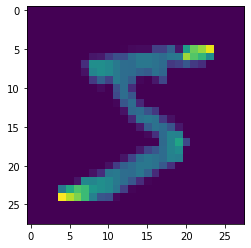

In [6]:
plt.imshow(x_train[0])
plt.show()

In [7]:
model = tf.keras.models.Sequential()

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.7275 - accuracy: 0.8205
Epoch 2/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1491 - accuracy: 0.9844
Epoch 3/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0950 - accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0843 - accuracy: 0.9892
Epoch 5/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0769 - accuracy: 0.9899
Epoch 6/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0690 - accuracy: 0.9907
Epoch 7/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0656 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0609 - accuracy: 0.9915
Epoch 9/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0581 - accuracy: 0.9920
Ep

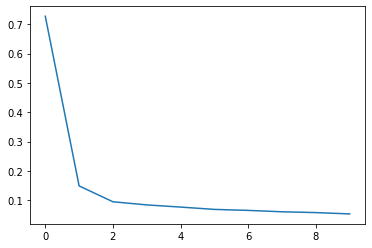

In [24]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.sigmoid, kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10)
plt.plot(history.history['loss'], label='train')


In [25]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.16681117582321167
0.9735


In [16]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [26]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

predictions = new_model.predict(x_test)

print(predictions)
print(np.argmax(predictions[10]))


[[8.23474420e-06 2.34617037e-04 6.87730033e-04 ... 9.96925652e-01
  2.38229011e-04 9.43673484e-04]
 [3.36006378e-05 7.99473491e-05 9.98857021e-01 ... 2.93886260e-04
  1.85375786e-04 1.12311509e-05]
 [1.08295835e-05 9.98395860e-01 1.35716167e-04 ... 1.06071704e-04
  9.49936977e-04 5.67202405e-05]
 ...
 [1.03110280e-04 1.70335567e-04 8.36613530e-04 ... 1.60777679e-04
  2.55336490e-04 1.53589866e-03]
 [1.21475750e-05 4.45381346e-07 6.48935820e-05 ... 2.76397918e-06
  1.41466342e-04 1.11252419e-04]
 [2.32370192e-04 5.82194443e-05 5.69729527e-05 ... 2.38774703e-07
  2.33572384e-04 2.67013111e-05]]
0


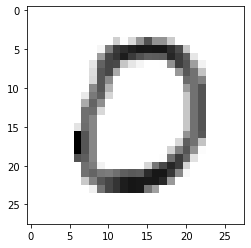

In [27]:
plt.imshow(x_test[10],cmap=plt.cm.binary)
plt.show()


1 : The number is probably a 3


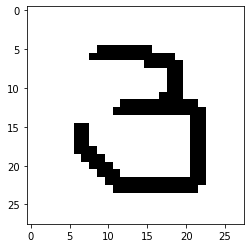

2 : The number is probably a 6


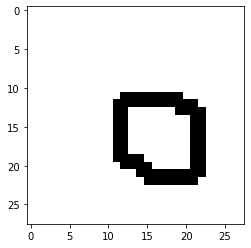

3 : The number is probably a 5


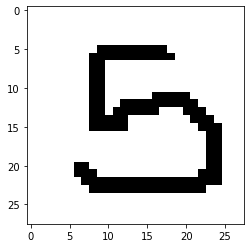

4 : The number is probably a 8


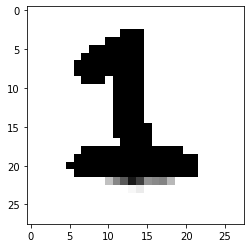

5 : The number is probably a 9


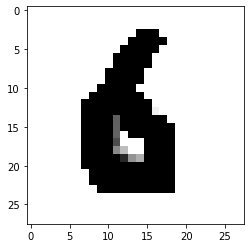

6 : The number is probably a 0


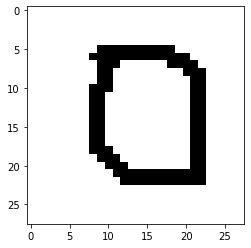

7 : The number is probably a 9


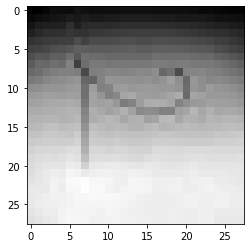

8 : The number is probably a 9


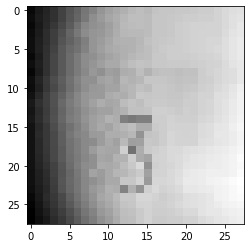

9 : The number is probably a 9


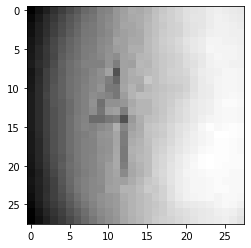

10 : The number is probably a 9


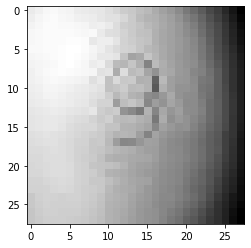

In [28]:
for x in range(1,11):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    
    prediction = model.predict(img)
    print(x,": The number is probably a {}".format(np.argmax(prediction)))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    